# An exploratory data analysis of climate change and natural disasters

### The goal is to investigate and analyze climate change and its relationship to natural catastrophes (occurrence and economic impact). Global temperature rise is utilized as an indication of climate change in this investigation.

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt

## Global Temperature

In [2]:
# Load the global temperature dataset
temp_df = pd.read_csv('input/GlobalTemperatures.csv')
df = temp_df.copy()

df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


#### After observing the data, remove the data not required for the analysis and keep only the relevant data. The column 'LandAndOceanAverageTemperature' gives information about the overall earth temperature. 
#### The global temperature dataset has monthly granularity. It can be resampled annually to reduce the number of entries, without losing the average temperature information.

## Data Preprocessing

In [3]:
# Choose the column of date and Temperature.
df = df[['dt', 'LandAndOceanAverageTemperature']]

In [4]:
# Save the date as an Year. 
df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace = True)

# Sort the column with respect to Year
df.sort_index(axis = 0)

,LandAndOceanAverageTemperature
dt,
1750-01-01,NaN
1750-02-01,NaN
1750-03-01,NaN
1750-04-01,NaN
1750-05-01,NaN
...,...
2015-08-01,17.589
2015-09-01,17.049
2015-10-01,16.290


In [5]:
# Resample annually and rename index & columns
df = df.resample('A').mean()
df.rename(columns = {'LandAndOceanAverageTemperature': 'AnnualAverageTemp'}, inplace = True)
df.index.rename('Year')
df.index = df.index.year

#### After observing the data, remove the data not required for the analysis and keep only the relevant data. Check the number of missing values and the corresponding years


In [6]:
df

,AnnualAverageTemp
dt,
1750,NaN
1751,NaN
1752,NaN
1753,NaN
1754,NaN
...,...
2011,15.769500
2012,15.802333
2013,15.854417


In [7]:
#Remove the Null values which han NaN value

print(df.isnull().sum())
print(df[df['AnnualAverageTemp'].isnull()].index)

AnnualAverageTemp    100
dtype: int64
Int64Index([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
            1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
            1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
            1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
            1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
            1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
            1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
            1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
            1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
            1849],
           dtype='int64', name='dt')


#### The first hundred years from 1750 don't have temperature values. Drop those entries to begin the analysis from 1850 onwards. Drop those entries to begin the analysis

In [8]:
df.dropna(inplace = True)
print(df.isnull().sum())

AnnualAverageTemp    0
dtype: int64


#### In climate science, temperature anomaly represents temperature pattern accurately than absolute temperature. It is a measure of the departure from baseline temperature. Basically, it indicates how much warmer or cooler it is than the baseline. The baseline used here is the average temperature over the 30-year period 1951-1980 (base period used by NASA).

#### The temperature anomaly values are stored in a new column in the data frame and the absolute temperature values are dropped.

In [9]:
# Calculate the average value of global temperature as a baseline 
ref = df.loc['1951':'1980'].mean()['AnnualAverageTemp'] 

# Create the temperature anomaly column
df['Temperature Uncertainity'] = df['AnnualAverageTemp'] - ref
df.drop(['AnnualAverageTemp'], axis = 1)

df.head()

,AnnualAverageTemp,Temperature Uncertainity
dt,,
1850,14.867167,-0.432381
1851,14.991833,-0.307714
1852,15.006500,-0.293047
1853,14.955167,-0.344381
1854,14.991000,-0.308547


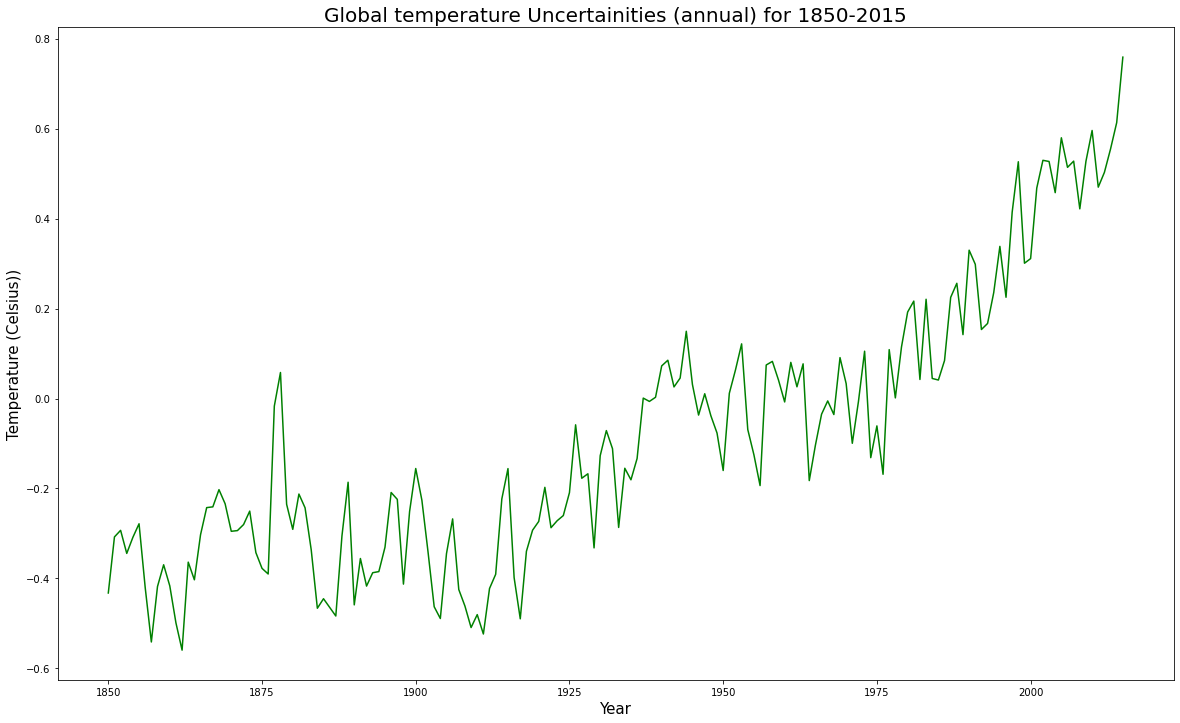

In [10]:
# Plot the temperature Uncertainity
plt.figure(figsize = (20, 12))

plt.plot(df['Temperature Uncertainity'], 'g')

plt.title('Global temperature Uncertainities (annual) for 1850-2015', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Temperature (Celsius))', fontsize = 15)

plt.show()

#### The warming of the Earth is easily seen when the temperature difference is plotted over time. From from 1920 onwards, the warming becomes increasingly noticeable. The Earth is 0.76 degrees Celsius warmer than normal in 2015. The aforementioned finding backs up the scientific consensus that the world is warming.

## Natural disasters

#### Let's explore the natural disaster data and analyse how the occurrence of various types of natural disasters has changed over the years.

In [11]:
# Load the natural disaster dataset
disaster = pd.read_csv('input/number-of-natural-disaster-events.csv')
df1 = disaster.copy()

df1.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [12]:
# Remove the 'Code' column
df1.drop(['Code'], axis = 1)

# Check the different types of 'Entity' values
df1['Entity'].unique()

array(['All natural disasters', 'Drought', 'Earthquake',
       'Extreme temperature', 'Extreme weather', 'Flood', 'Impact',
       'Landslide', 'Mass movement (dry)', 'Volcanic activity',
       'Wildfire'], dtype=object)

#### The 'Entity' column contains 10 types of natural disaster entries and their summation, 'All natural disasters'. For further analysis it is suitable to rearrange the data according to the disaster categories.

In [13]:
# Pivot the dataframe
df1 = df1.pivot(index = 'Year', columns = 'Entity', values = 'Number of reported natural disasters (reported disasters)')
df1.head()

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,,
1900,5.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
1901,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,9.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN
1903,8.0,1.0,1.0,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN
1904,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


#### There are a number of 'NaN' numbers, which could indicate missing data or unreported disasters. We'll replace them with 0 for our study, which means there will be no disasters, and it will also make charting the data easier.

In [14]:
# Remove the 'Impact' column
df1.drop(['Impact'], axis = 1)

# Handle missing values and rename columns
df1.fillna(value = 0, inplace = True)
df1.head()

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,,
1900,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1901,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0
1903,8.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0
1904,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


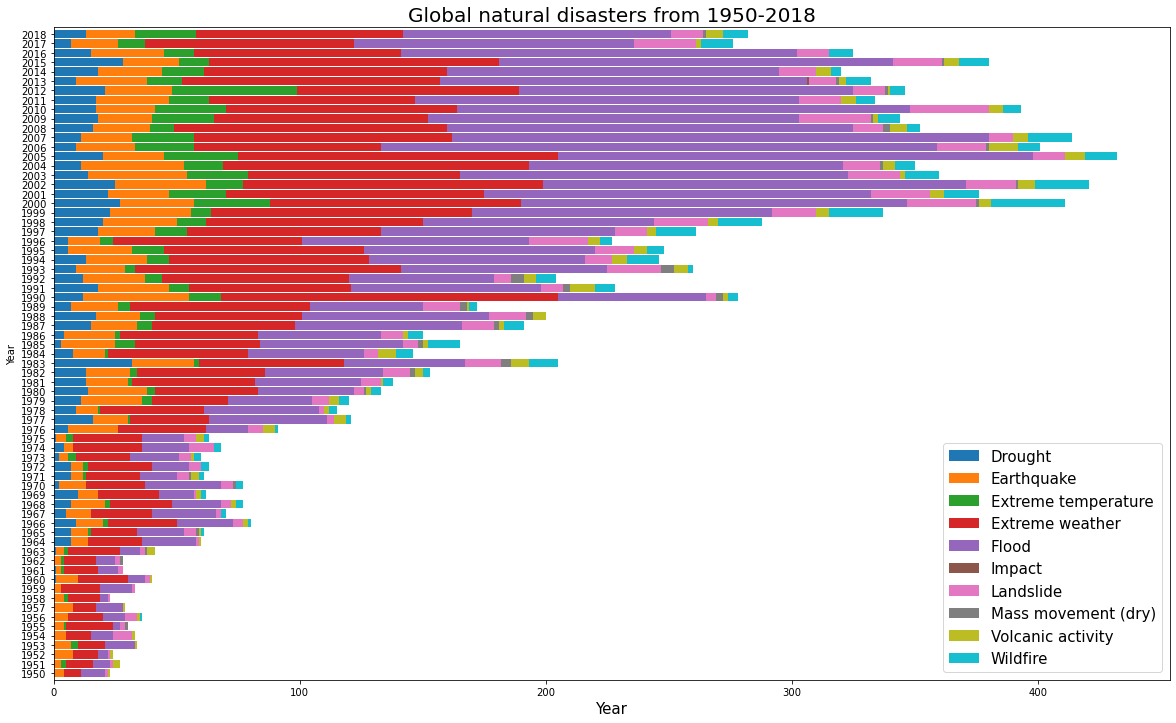

In [15]:
# Plot the types of natural disasters occurrences for 1950-2018
df1.drop(['All natural disasters'], axis = 1).loc[1950:].plot.barh(stacked = True,width=0.9, figsize = (20, 12))

plt.title('Global natural disasters from 1950-2018', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.legend(loc = 4, prop = {'size': 15})

plt.show()

#### The bar plot above, with unique stacks for each catastrophe category, illustrates that the occurrence of floods has grown dramatically in comparison to other disasters throughout the years. Extreme weather is the second most common rise in incidence, followed by earthquakes. The graphic also illustrates that the overall number of natural catastrophes has been steadily increasing throughout the world. The graphic below demonstrates this more clearly.

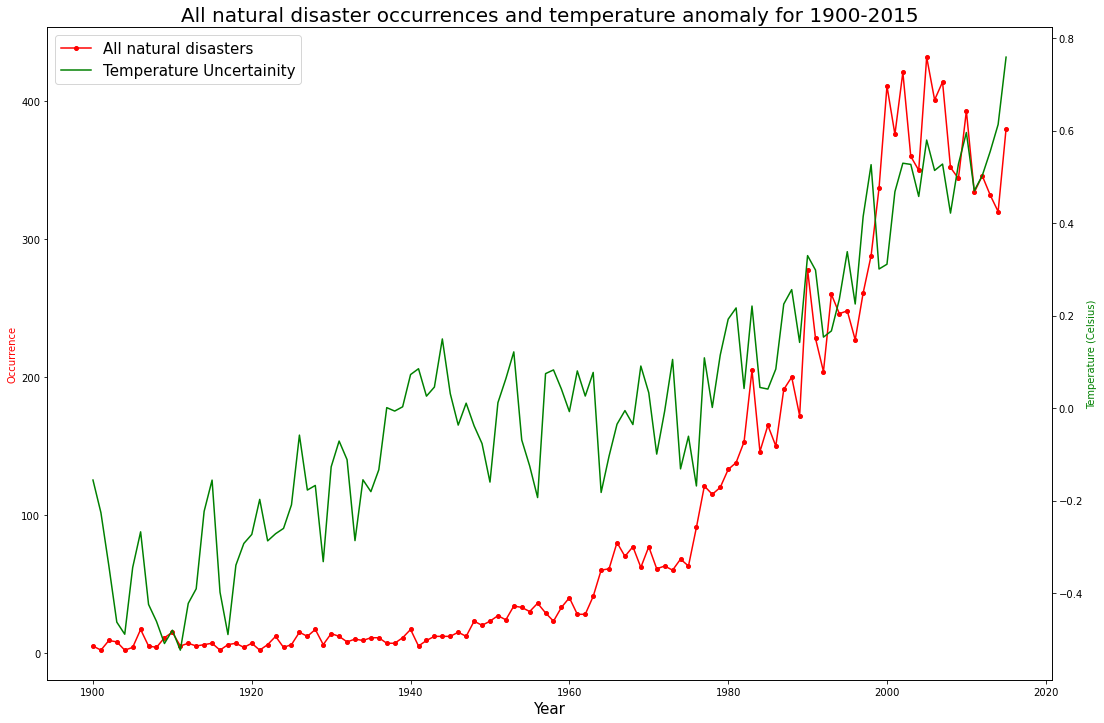

In [16]:
# Plot all natural disasters occurrences and temperature anomaly for comparison
fig, ax = plt.subplots(figsize = (18, 12))
ax2 = ax.twinx()

line1 = ax.plot(df1.loc[:2015, 'All natural disasters'], '-ro', markersize = 4, label = 'All natural disasters')
line2 = ax2.plot(df.loc[1900:, 'Temperature Uncertainity'], 'g-', label = 'Temperature Uncertainity')

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.title('All natural disaster occurrences and temperature anomaly for 1900-2015', fontsize = 20)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Occurrence', color = 'r')
ax2.set_ylabel('Temperature (Celsius)', color = 'g')
ax.legend(lines, labels, loc = 0, prop = {'size': 15})

plt.show()

#### Natural disasters are on the rise globally, particularly after 1940, when temperatures begin to rise above average

Let's also investigate the economic damage caused by natural disasters.

In [17]:
# Load the economic damage dataset
economical = pd.read_csv('input/economic-damage-from-natural-disasters.csv')
df2 = economical.copy()

df2.head()

,Entity,Code,Year,Total economic damage from natural disasters (US$)
0,All natural disasters,NaN,1900,30000000
1,All natural disasters,NaN,1901,0
2,All natural disasters,NaN,1902,0
3,All natural disasters,NaN,1903,480000000
4,All natural disasters,NaN,1904,0


In [18]:
# Remove the 'Code' column
df2.drop(['Code'], axis = 1, inplace = True)

# Pivot the dataframe
df2 = df2.pivot(index = 'Year', columns = 'Entity', values = 'Total economic damage from natural disasters (US$)')
df2.head()

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,,
1900,30000000.0,NaN,NaN,NaN,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN
1901,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,480000000.0,NaN,NaN,NaN,NaN,480000000.0,NaN,NaN,NaN,NaN,NaN
1904,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Remove the irrelevant columns, rename the other columns and handle the missing values.

In [19]:
df2.drop(['Impact'], axis = 1, inplace = True)

df2.fillna(value = 0, inplace = True)

df2.head()

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,
1900,30000000.0,0.0,0.0,0.0,30000000.0,0.0,0.0,0.0,0.0,0.0
1901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,480000000.0,0.0,0.0,0.0,0.0,480000000.0,0.0,0.0,0.0,0.0
1904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


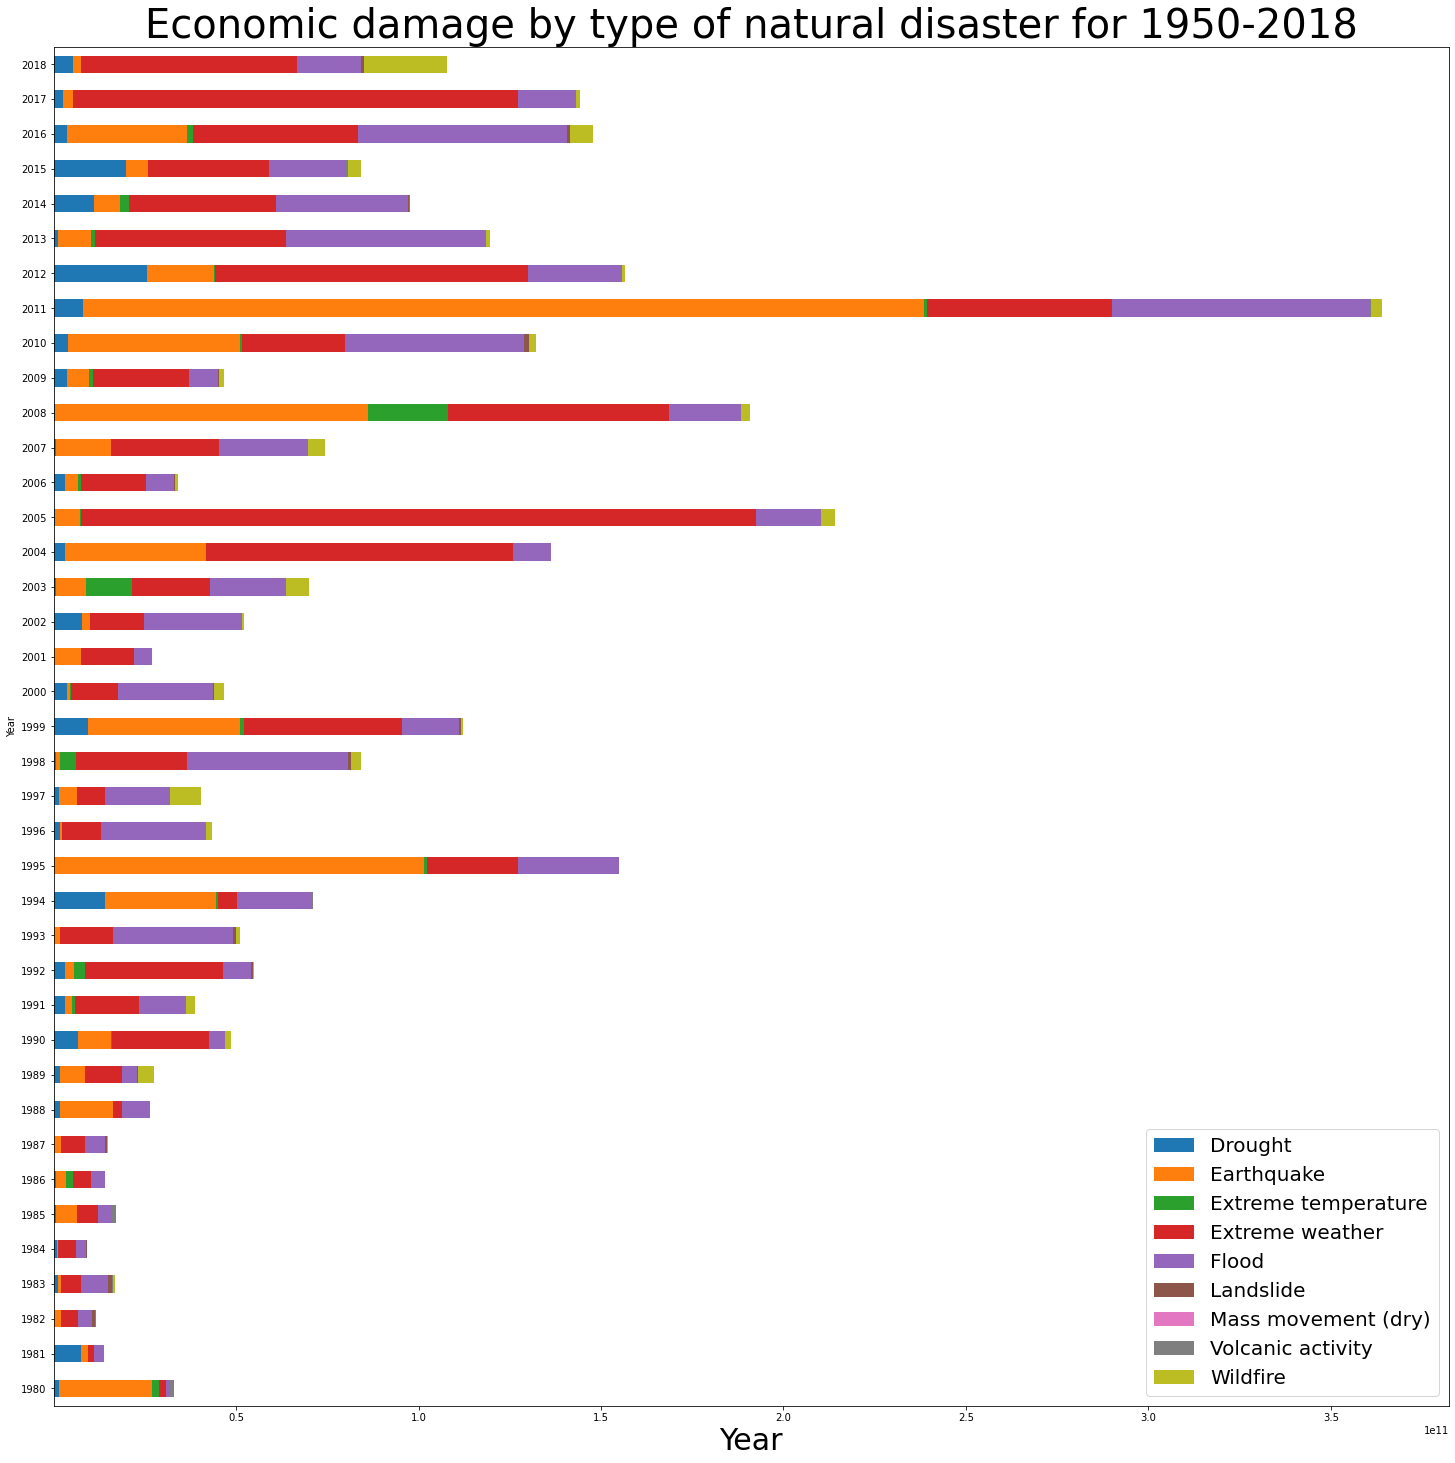

In [20]:
# Plot the economic damage categorised by the type of natural disasters for 1950-2018
df2.drop(['All natural disasters'], axis = 1).loc[1980:].plot.barh(stacked = True, figsize = (25, 25))

plt.title('Economic damage by type of natural disaster for 1950-2018', fontsize = 40)
plt.xlabel('Year', fontsize = 30)
plt.legend(loc = 4, prop = {'size': 20})

plt.show()

#### Economic damage is very varied since it is determined by numerous aspects such as catastrophe kind, disaster location, disaster intensity, disaster management activities, and so on.

#### one crucial tendency that emerges from the plot is that the overall economic loss from all calamities is growing over time. The major factor is an increase in catastrophe occurrences (linked to global temperature rise), albeit not all disasters contribute equally to economic harm. Another explanation for increased economic harm might be more income development, which leads to greater infrastructure, land productivity, and so on.

# References of Dataset
-  The source of the global temperature data is the Kaggle dataset https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data by Berkeley Earth.
-  Natural diasaster data is taken from https://ourworldindata.org/natural-disasters (data published by EMDAT (2019): OFDA/CRED International Disaster Database, Université catholique de Louvain – Brussels – Belgium)